In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [3]:
with open('all.pickle','rb') as f:
    results = pickle.load(f)

In [4]:
len(results)

2115

In [5]:
results['Abyssal_whip'].keys()

dict_keys(['sma', 'buyAndHold', 'startMAE', 'predictions', 'persist', 'endMAE', 'sma_model', 'stochOscil', 'numPrices', 'budget', 'momentum_model', 'testPrices', 'momentum', 'endLoss', 'numEpochs', 'startLoss', 'model_opt', 'perfect', 'opt_params', 'item', 'model', 'stochOscil_model'])

In [16]:
mae = [results[item]['endMAE'] for item in results]
maeChange = [results[item]['startMAE']-results[item]['endMAE'] for item in results]

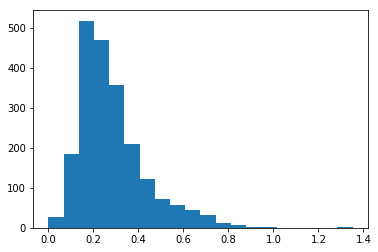

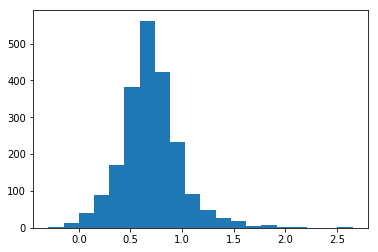

In [17]:
plt.hist(mae,20)
plt.show()
plt.hist(maeChange,20)
plt.show()

In [12]:
maeChange = [(item,results[item]['startMAE']-results[item]['endMAE']) for item in results]
maeChange = sorted(maeArr, key=lambda x: x[1], reverse=True)

In [13]:
print(maeChange[:100])

[("Bob's_blue_shirt", 2.651237633265555), ("Red_spiders'_eggs", 2.1952215605584735), ('Adamant_shield_(h1)', 2.141125755824826), ('Golden_scarab', 1.9443186295980759), ('Strength_mix(2)', 1.9062689213590187), ('Guthix_stole', 1.8896975981240924), ('Armadyl_page_3', 1.8887587689540604), ('Infinity_top', 1.8837679120288655), ('Adamant_javelin', 1.8443381102247673), ('Holy_symbol', 1.8282470204613426), ('Blue_wizard_hat', 1.8025506043976003), ('Wooden_cat', 1.7742957498539578), ('Sapphire_bolt_tips', 1.7213745365765962), ('Yew_roots', 1.7098051553761415), ('Highwayman_mask', 1.6932982811365616), ('Dagannoth_hide', 1.6664517995986072), ('Cat_mask', 1.6618133612654427), ('Oak_shortbow', 1.6319997024807065), ('Bronze_dagger(p++)', 1.6104843006215313), ('Brown_headband', 1.6008644521236421), ('Master_wand', 1.5958192016590724), ('Team-20_cape', 1.5854482196948745), ('Torstol_potion_(unf)', 1.5831759597767483), ('Super_restore(1)', 1.5799532901495694), ('Black_boater', 1.5648755026134578), ('R

In [15]:
print(maeChange[-100:])

[('Mystic_water_staff', 0.22856758368963548), ('Mithril_brutal', 0.228034421115775), ('Ruby_necklace', 0.22799404307522564), ('Raw_rainbow_fish', 0.2267853786999529), ('Spiny_helmet', 0.22652934613552955), ('Black_kiteshield', 0.22517734881151807), ('Mystic_gloves_(light)', 0.22460687695579096), ('Dark_fishing_bait', 0.2211255355314774), ("Verac's_helm", 0.21836326490579683), ('Dragon_dagger(p)', 0.2153264433145523), ('Iron_arrowtips', 0.21505481722679998), ('Combat_bracelet', 0.21413309011947024), ('Fire_battlestaff', 0.21182735704562883), ('Emerald_bolt_tips', 0.20818568518893277), ('Dust_rune', 0.20557801479643042), ('Steel_dagger(p)', 0.20510313321243634), ('Rune_pickaxe', 0.20490279367024244), ('Saradomin_plateskirt', 0.20196566385301684), ('Noose_wand', 0.20038689442656255), ('Filled_plant_pot', 0.19990827495401553), ('Tarromin_tar', 0.19841252826154232), ('Adamantite_bar', 0.19790965162894936), ('Bandos_plateskirt', 0.19767994115298448), ('Zamorak_mix(1)', 0.19517047703266144), 

In [21]:
prices = [items.getPrices(item)[-1] for item in results]
variance = [np.var(results[item]['testPrices']) for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [22]:
print('price,mae',np.corrcoef(prices,mae)[0][1])
print('bl,price',np.corrcoef(buylimits,mae)[0][1])
print('prof,pers',np.corrcoef(mae,pers)[0][1])
print('mae,perf',np.corrcoef(mae,perf)[0][1])
print('mae,bah',np.corrcoef(mae,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('variance,mae',np.corrcoef(variance,mae)[0][1])

price,mae -0.0030459703689468304
bl,price 0.011552200991384707
prof,pers -0.08929415982378207
mae,perf 0.059780832149030065
mae,bah -0.04244576522604867
profdiff,mae 0.06058094731635594
variance,mae -0.016863394100601357
